# ESTADÍSTICA INFERENCIAL

### En qué casos ayuda la estadística inferencial al análisis de datos?

- Generalización a partir de Muestras: 
  - Estimación de Parámetros: Permite estimar parámetros desconocidos de una población (como la media, la varianza o la proporción) a partir de una muestra de datos. Esta técnica se utiliza cuando es impráctico o imposible recopilar datos de toda la población.
  - Intervalos de Confianza: Proporcionan un rango de valores dentro del cual es probable que se encuentre el parámetro poblacional,
     junto con un nivel de confianza asociado. Esto ayuda a comunicar la precisión de las estimaciones y la incertidumbre inherente.
- Pruebas de Hipótesis


### ¿Qué diferencia hay entre estadística descriptiva y estadística inferencial?

La estadística descriptiva y la estadística inferencial son dos ramas de la estadística que se utilizan para diferentes propósitos. Las principales diferencias entre ambas son:

Estadística descriptiva:

* Se utiliza para describir y resumir los datos observados de forma sintética y significativa.
* Se enfoca en el análisis, el resumen y la presentación de los resultados relacionados con un conjunto de datos derivados de una muestra o de toda la población.
* Proporciona resúmenes sobre los datos de la población o muestra, lo que permite estructurar y representar la información contenida en los datos.
* No se realizan inferencias sobre la población.

Estadística inferencial:

* Se utiliza para extraer conclusiones de los datos y realizar inferencias sobre la población a partir de una muestra.
* Busca predecir o deducir características o resultados esperados de una población, basados en los datos obtenidos de una muestra de esa población.
* Se utiliza para tomar decisiones y hacer predicciones sobre la población en general.
* Se basa en la probabilidad y en la teoría de la muestra.


## Conceptos de Población y Muestra

### Población

La población en estadística se refiere a todo el grupo de elementos o individuos que están siendo estudiados. Es como si fuera un gran grupo de personas o cosas que queremos entender o analizar en detalle.

**Ejemplo de Población:** Si queremos saber la altura promedio de todas las personas en un país en particular, la población sería todas las personas que viven en ese país.

### Muestra:

Una muestra es un subconjunto más pequeño y representativo de la población total. En lugar de estudiar a todas las personas o elementos en la población, tomamos una muestra para obtener información sobre la población en su conjunto de manera más eficiente.

**Ejemplo de Muestra:** Si en lugar de medir la altura de todas las personas en un país, seleccionamos aleatoriamente a 100 personas de diferentes regiones y edades y medimos sus alturas, entonces eso sería nuestra muestra.

### Diferencia entre Población y Muestra

La diferencia clave entre población y muestra es que la población incluye a todos los individuos o elementos en el grupo que estamos estudiando, mientras que la muestra es solo un grupo más pequeño pero representativo de la población. Usamos la muestra para hacer suposiciones y tomar decisiones sobre la población en su conjunto sin tener que estudiar a cada miembro de la población.

In [2]:
# ! pip install scipy

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("bank-additional-clean-nonulls.csv")
df.head(2)

,income,kidhome,teenhome,dt customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,emp var rate,cons price idx,cons conf idx,nr employed,y,date,latitude,longitude,age,euribor3m
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191.0,no,2019-08-02,41.495,-71.233,39.0,4.8570
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191.0,no,2016-09-14,34.601,-83.923,57.0,4.7866


## ¿Qué vamos a ver en la clase de hoy?

- Intervalos de confianza
- Contraste de hipótesis

# INTERVALOS DE CONFIANZA

Pretendemos estimar, predecir ciertos parámetros poblacionales a partir de una muestra. Para esto es necesario decidir el nivel de confianza que queremos tener. 

Ejemplo, si dijeramos que la media de alturas de la población con un 95% de nivel de confianza está entre 1.5 - 1.8 metros, estamos diciendo que teniendo en cuenta la muestra analizada, con un nivel de seguridad del 95% aseguramos que la media poblacional se encuentra entre estos valores.

Niveles de confianza más altos (como 99%) brindan más seguridad, pero a costa de intervalos más anchos y menos precisos. Por otro lado, niveles de confianza más bajos (como 90%) producen intervalos más estrechos pero con menor seguridad. El nivel de confianza es crucial en la interpretación y comunicación de resultados estadísticos.

Para el caso anterior, si quiero tener un nivel de confianza mayor, necesitaré abrir el intervalo, por ejemplo, asegurar que la media de la estatura de la población se encuentra en un 99% de seguridad entre 1.4-1.8 (estamos ganando confianza pero disminuimos la precisión del intervalo)


## Distribución Normal

La distribución gaussiana o normal es una de las distribuciones de probabilidad más importantes en estadística. Se caracteriza por tener una forma de campana, simétrica alrededor de su media, y está completamente definida por dos parámetros: la media (μ) y la desviación estándar (σ). 

**Características de la Distribución Normal o Gaussiana:**

* La media (μ) es el punto en el que se encuentra el pico de la campana y representa el valor central de la distribución.
* La desviación estándar (σ) controla cuán extendida o agrupada está la distribución alrededor de la media.
* La distribución normal es simétrica, lo que significa que la mitad izquierda es un espejo de la mitad derecha de la curva.
* A medida que aumenta la desviación estándar, la distribución se vuelve más ancha y achatada; a medida que disminuye, se vuelve más estrecha y puntiaguda.

**Ejemplo de la distribución normal:**

Un ejemplo común de una distribución normal es la distribución de alturas de la población. Si se mide la altura de una gran muestra representativa de personas, generalmente se encontrará que sigue una distribución normal. La mayoría de las personas tienen alturas cercanas a la media, y a medida que nos alejamos de la media hacia valores más altos o más bajos, encontramos menos personas con esas alturas extremas.

**Identificación de una Distribución Gaussiana:**

Para identificar si un conjunto de datos sigue una distribución gaussiana, puedes realizar algunas comprobaciones:

1. **Histograma:** Crea un histograma de tus datos y observa si tiene una forma de campana. De ser así, es una indicación de que podría seguir una distribución normal.
2. **Prueba de normalidad:** Puedes utilizar pruebas estadísticas como la prueba de Kolmogorov-Smirnov o la prueba de Shapiro-Wilk para evaluar si tus datos se ajustan a una distribución normal.

Es importante destacar que en la práctica, los datos reales a menudo no siguen una distribución perfectamente normal, pero la distribución normal es un modelo útil y se utiliza con frecuencia en estadística debido a sus propiedades matemáticas y su amplia aplicabilidad en muchos contextos.

Para generar una distribución de datos normal usaremos el método `np.random.normal()`. Si sintaxis es:

```python
np.random.normal(loc, scale, size)
```

Donde:

* `loc`: Es la media (o promedio) de la distribución normal que deseas generar. Por defecto, es 0.0.
* `scale`: Es la desviación estándar de la distribución normal que deseas generar. Por defecto, es 1.0.
* `size`: Es el tamaño de la muestra que deseas generar. Puede ser un número entero o una tupla que especifique las dimensiones de la muestra (como lo hicimos en NumPy). Por defecto, es None, lo que genera un solo número aleatorio.

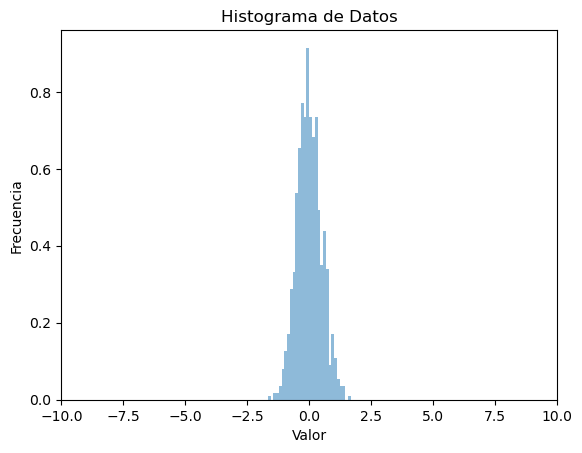

In [4]:
# generamos un array con media = 0, desviación estándar = 1, 1000 muestras
data = np.random.normal(0, 0.5, 1000) 

# creamos un DataFrame con los datos normales creados previamente
df_normal = pd.DataFrame({'Datos': data})

# Crear un histograma para visualizar la distribución
plt.hist(df_normal['Datos'], 
         bins=30, 
         density=True, 
         alpha=0.5)

# ponemos título a la gráfica
plt.title('Histograma de Datos')

# cambiamos el nombre del eje x
plt.xlabel('Valor')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia')
plt.xlim(-10, 10);

# como podemos ver los datos generados tienen forma de campana de Gauss, por lo que podemos decir que es una distribución normal. 

## Ejemplo 1

Imagina que eres el gerente de un centro de llamadas de una empresa de servicios financieros. Tu equipo realiza llamadas a clientes para ofrecerles productos financieros y resolver sus consultas. 
- Quieres entender mejor cuánto tiempo en promedio pasan tus agentes en una llamada y tener una idea de la variabilidad en la duración de las llamadas. 
- Esto es importante para la planificación de recursos, la gestión de la carga de trabajo y la optimización de la productividad de tu equipo. 

## A tener en cuenta:
- Estamos trabajando con una muestra, no una población

### Receta: Esto es lo que haremos siempre
1. Vemos la distribución de llamadas junto con la media
2. Calculamos la desviación estandard (std)
3. Seleccionamos un nivel de confianza
4. Calculamos el intervalo de confianza

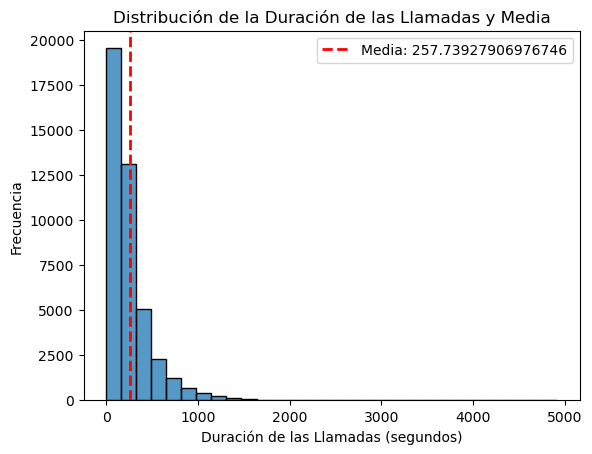

In [5]:
# 1. Vemos la distribución de llamadas junto con la media

mean_duration= df['duration'].mean()

# Visualización: Histograma con la media
sns.histplot(df['duration'], bins=30)
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_duration}')

# Cambiar los nombres de los ejes
plt.xlabel('Duración de las Llamadas (segundos)')
plt.ylabel('Frecuencia')

# Cambiar el título del gráfico
plt.title('Distribución de la Duración de las Llamadas y Media')
plt.legend()
plt.show()



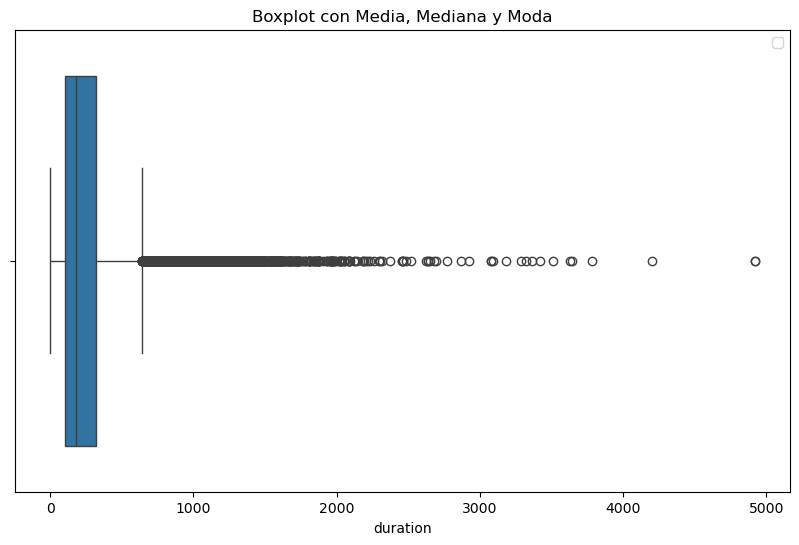

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration'])

# Añadir leyenda y título
plt.legend()
plt.title('Boxplot con Media, Mediana y Moda')

# Mostrar el gráfico
plt.show()

In [7]:
# 2. Calculamos la desviación estandard (std)

std_duration = df['duration'].std()
mean_duration = df['duration'].mean()
n = len(df['duration'])

confidence = 0.95

# 3. Seleccionamos un nivel de confianza
El nivel de confianza indica cuán seguro estás de que tu resultado es correcto.

Otro ejemplo:
- Imagina que estás encuestando a clientes para estimar cuántas personas están satisfechas con un producto. Como no puedes encuestar a toda la población, tomas una muestra.
- Si eliges un nivel de confianza del 95%, significa que estás 95% seguro de que la verdadera satisfacción de los clientes está dentro del rango que calculaste.
- En otras palabras, si realizas la encuesta 100 veces,  y calculas un intervalo de confianza para cada muestra, el 95% de esos intervalos incluirán la verdadera satisfacción de los clientes.

Otra forma de explicarlo:

- Un nivel de confianza del 95% significa que confías en que el proceso de construir intervalos capturará la media verdadera el 95% de las veces.

- No sabes si el intervalo específico que calculaste contiene la media verdadera, pero confías en el proceso.

- Si repites la encuesta muchas veces, el 95% de los intervalos capturarán la media verdadera, pero un 5% no lo hará.


In [8]:
# 4. Calculamos el intervalo de confianza

# Extraer la columna 'duration' (duración de llamadas en segundos)
durations = df['duration']
# Tamaño de la muestra
n = len(df['duration'])

# Calcular el intervalo de confianza al 95%
confidence_interval = stats.t.interval(
    confidence=0.99,         # Nivel de confianza
    df=n-1,             # Grados de libertad
    loc=mean_duration,  # Media de la muestra
    scale=std_duration/ np.sqrt(n)  # Error estándar de la media
)

# Mostrar el resultado
print(f"Media: {mean_duration:.2f} segundos")
print(f"Intervalo de Confianza al 99%: {confidence_interval[0].round(2), confidence_interval[1].round(2)}")

Media: 257.74 segundos
Intervalo de Confianza al 99%: (254.53, 260.95)


Respuesta: La duración media de las llamadas está contenida en (255.3, 260.2) con un nivel de confianza del 99%

# Necesitamos:
- media -> calculamos
- desviación standard -> calculamos
- tamaño de la muestra -> len(muestra)
- nivel de confianza -> lo decidimos nostras

**Interpretación**:  Indica que, con un 95% de confianza, podemos decir que la duración promedio de las llamadas estará entre 255.29 y 260.18 segundos.

Para que nos puede ayudar esto en un caso real: 

- **Planificación de Recursos:** Saber que el intervalo de confianza va desde, por ejemplo, 255.29 a 269.18 segundos de duración, nos puede permitir planificar la asignación de agentes y recursos en función de esa estimación.

- **Gestión de la Carga de Trabajo:** Si tienes un día con un alto volumen de llamadas, puedes utilizar esta estimación para estimar cuánto tiempo llevará atender a todos los clientes y garantizar una distribución adecuada de las llamadas entre los agentes.

## Ejemplo 2

- Imagina que estás desarrollando una estrategia de marketing dirigida a diferentes grupos de edad. Quieres asegurarte de que tus mensajes y ofertas sean relevantes para tus clientes. 
- Sin embargo, no puedes conocer la edad de todos los clientes, por lo que decides tomar una muestra aleatoria de registros de clientes y calcular un intervalo de confianza para la edad promedio de tu base de clientes.

En otras palabras:
- quieres saber la edad promedio de tus clientes para dirigir campañas apropiadas
- como no tienes toda la población (todos los clientes), vamos a trabajar con una muestra (un subgrupo)
- en este caso, vamos a dar un intervalo

### Receta
1. Vemos la distribución de edades junto con la media
2. Calculamos la desviación estandard (std)
3. Seleccionamos un nivel de confianza
4. Calculamos el intervalo de confianza

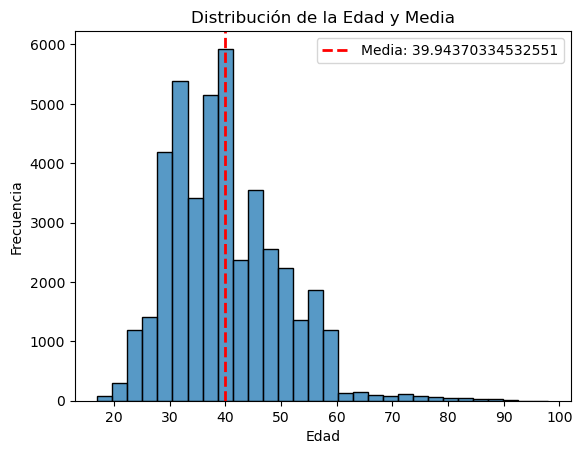

In [28]:
# 1. Vemos la distribución de edades junto con la media

mean_age= df['age'].mean()

# Visualización: Histograma con la media
sns.histplot(df['age'], bins=30)
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_age}')

# Cambiar los nombres de los ejes
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Cambiar el título del gráfico
plt.title('Distribución de la Edad y Media')
plt.legend()
plt.show()

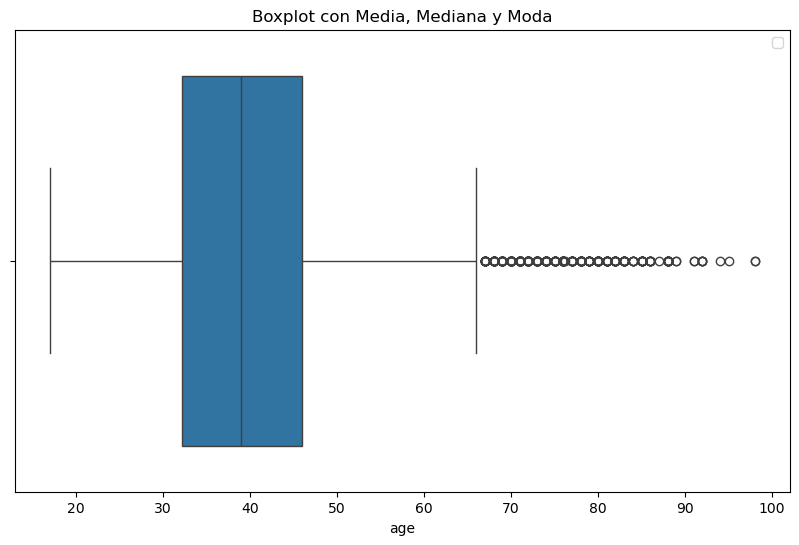

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])



# Añadir leyenda y título
plt.legend()
plt.title('Boxplot con Media, Mediana y Moda')

# Mostrar el gráfico
plt.show()

In [ ]:
# 2. Calculamos la desviación estandard (std)

std_age = df['age'].std()
mean_age = df['age'].mean()
n = len(df['age'])

conficence = 0.95

In [40]:
# 4. Calculamos el intervalo de confianza

# Extraer la columna 'age' (duración de llamadas en segundos)
age = df['age']
# Tamaño de la muestra
n = len(age)

# Calcular el intervalo de confianza al 95%
confidence_interval = stats.t.interval(
    confidence=confidence,         # Nivel de confianza
    df=n-1,             # Grados de libertad
    loc=mean_age,  # Media de la muestra
    scale=std_age/ np.sqrt(n)  # Error estándar de la media
)

# Mostrar el resultado
print(f"Media: {mean_age:.2f} años")
print(f"Intervalo de Confianza al 95%: {confidence_interval}")

Media: 39.94 años
Intervalo de Confianza al 95%: (39.84986884535741, 40.037537845293606)


**Interpretación**:  Indica que, con un 90% de confianza, podemos decir que la edad promedio de los clientes estará entre 39.93 y 40.09 segundos.

Para que nos pueden ser útiles estos valores: 

- **Segmentación Efectiva:** Podemos utilizar el intervalo de confianza para identificar los grupos de edad más probables entre nuestros clientes y adaptar las campañas de marketing específicamente a esas edades.

- **Optimización de Recursos:** Si observamos una amplia variabilidad en las edades de los clientes, podemos ajustar la asignación de recursos y personalizar tus estrategias para atender a un espectro más amplio de edades.

## Pruebas de Hipótesis
Una prueba de hipótesis es un procedimiento estadístico que se utiliza para tomar decisiones basadas en datos observados en relación con afirmaciones o suposiciones sobre una población o un proceso. Es una forma de evaluar la validez de una afirmación (hipótesis) sobre poblaciones basadas en la evidencia proporcionada por muestras de datos observados. Normalmente se siguen los siguientes pasos:
- **Formulación de la hipótesis**:
- **Elección del nivel de significancia**: El nivel de significancia α (alfa) es la probabilidad de rechazar la hipótesis nula cuando en realidad es verdadera. Es una decisión subjetiva tomada por el investigador y generalmente se elige antes de realizar la prueba de hipótesis. Los valores comunes de nivel de significancia son 0.05 (5%) y 0.01 (1%), pero también pueden variar dependiendo del campo de estudio, la naturaleza del problema y las convenciones estadísticas.


## ¿Qué es el  nivel de significancia?

El nivel de significancia (𝛼) es el complemento del nivel de confianza. Indica la probabilidad de cometer un error al rechazar la hipótesis nula cuando en realidad es verdadera.

Ejemplo simple:

Si seleccionas un nivel de significancia del 5% (𝛼=0.05), significa que aceptas un 5% de riesgo de cometer un error tipo I (rechazar la hipótesis nula cuando en realidad es verdadera).

Elegir un nivel más bajo de nivel de significancia (que me llevaría a aceptar más fácilmente la hipótesis nula) o un nivel de significancia más alto (sería más exigente para aceptar la hipótesis nula) depende del contexto. ¿Prefiero no aceptar hipótesis nula aun a riesto de equivocarme y que sea cierta? ¿O prefiero aceptarla aun a riesgo de dar por válidas afirmaciones que no lo son, y que realmente no sea verdadera?


| Decisión / Realidad | H₀ verdadera                                           | H₁ verdadera                                                  |
| ------------------- | ------------------------------------------------------ | ------------------------------------------------------------- |
| **Rechazar H₀**     | **Error tipo I (α)**: rechazamos H₀ cuando era cierta. **FALSO NEGATIVO** | Decisión correcta (Detectamos el efecto).                     |
| **No rechazar H₀**  | Decisión correcta (Aceptamos H₀ siendo cierta).        | **Error tipo II (β)**: no rechazamos H₀ cuando H₁ era cierta. **FALSO POSITIVO** |


- **Selección del estadístico de prueba**: 

![alt text](diagrama_flujo_prueba_hipotesis.png)

1) Paso primero: Ver si los datos son normales (kolmogorov-smirnov si muestra > 50 o Shapiro-Wilk si <= 50)
2) Si no son normales --> Hacemos test que evalúe medianas y no medias para decidir si rechazamos o no hipotesis nula (si 2 grupos <u> Mann Whitney </u>, si más de dos grupos <u> Kruskal Wallis </u>)
3) Si son normales --> Evaluamos homogeneidad de varianzas (Con barlett):
      - Si son homogeneas -->  <u> t de student </u> (si dos grupos) <u> ANOVA </u> si más dos grupos 
      - Si no son homogeneas --> <u> test de Welsch </u> (si dos grupos) <u> Welch-ANOVA </u> si más de dos grupos

En el caso de contraste de hipotesis con una muestra usaremos test de student para muestras pareadas y para un solo grupo. 


Para todos estos casos asumiremos independencia de observaciones: No hay un test estadistico para ello. Debería ser muestras independientes. La independencia de las observaciones es uno de los supuestos más importantes, pero a diferencia de la normalidad o la homogeneidad de varianzas, no se puede “testear” directamente con un test estadístico general. Se evalúa más por    diseño experimental y, en algunos casos, con técnicas indirectas.


In [ ]:
# SHAPIRO


p_value = stats.shapiro(df['age']).pvalue
if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribución normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    

print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
1.874346850798574e-72


In [156]:
# kolmogorov - smirnov

p_value = stats.kstest(df['age'], 'norm').pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribución normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
0.0


In [43]:
# kolmogorov - smirnov

p_value = stats.kstest(df[df['marital'] == 'married']['age'], 'norm').pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribución normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
0.0


In [45]:
p_value = stats.kstest(df[df['marital'] == 'single']['age'], 'norm').pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribución normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
0.0


In [46]:
p_value = stats.kstest(df[df['marital'] == 'divorced']['age'], 'norm').pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Distribución normal")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> No normal")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> No normal
0.0


In [47]:
# HOMOGENEIDAD VARIANZAS (2 O MÁS GRUPOS)

casados = df[df['marital'] == 'married']
solteros = df[df['marital'] == 'single']
divorciados = df[df['marital'] == 'divorced']

In [48]:
# BARLETT (si grupos son normales) # LEVENE si no lo son

p_value = stats.bartlett(casados['age'],solteros['age'],divorciados['age']).pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos
5.1295473400066467e-228


In [159]:
p_value = stats.levene(casados['age'],solteros['age'],divorciados['age']).pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos")
    
print(p_value)


Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos
3.2552030472112654e-178


## Ejercicios

**Dataset Titanic**:
- 1) Normalemente, el precio medio del ticket para embarcar en primera clase era de $65. Queremos comprobar si esto sigue siendo cierto.
- 2) Queremos comprobar si el precio medio del ticket es mayor que $65.
- 3) Queremos comprobar si los precios medios de las mujeres son los mismos que los de los hombres.

**Dataset Presión Sanguínea**:
- 4) Queremos evaluar la efectividad de un medicamento en el control de la presión sanguínea.

**Dataset Salarios Data Scientists**:
- 5) Queremos comprobar si el tamaño de la empresa influye en los salarios.

**Dataset Bank**:
- 6) Queremos comprobar si existe diferencia entre la duración media de las llamadas entre las diferentes categorías de estado civil.
- 7) ¿Hay diferencia entre ingresos promedio según nivel de educación?

## Receta
1. Formulación de hipótesis
2. Cálculo de métricas
3. Elección de nivel de significancia
----------------------------------------------------------------------------------------------
4. Comprobación de condiciones
5. Selección del estadístico
6. Toma de decisión
----------------------------------------------------------------------------------------------
7. Interpretación de resultados

In [ ]:
# vamos a definir una función para poder hacer el t-test de Student
def prueba_hipotesis(alfa, *args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney (alternativa no paramétrica).

    Parámetros:
    *args: listas o arrays con los datos de cada grupo.

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            p_valor = stats.ttest_ind(*args, equal_var=True).pvalue
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            p_valor = stats.ttest_ind(*args, equal_var=False).pvalue
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        try: # si tengo dos grupos
            p_valor = stats.mannwhitneyu(*args).pvalue
            test_usado = "Mann-Whitney U (prueba no paramétrica)"
        except: # si tengo mas de dos grupos
            p_valor = stats.kruskal(*args).pvalue
            test_usado = "Kruskal Wallis"



    # Nivel de significancia
    alfa = alfa

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f" p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado

In [161]:
# Funciones para el uso de los test estadísticos t-test
# One sample t-test

# st.ttest_1samp(datos_muestra, H0)

# st.ttest_1samp(datos_muestra, H0, alternative = "greater")

# Two sample t-test

# st.ttest_ind(datos_muestra1, datos_muestra2, equal_var=False)


# Paired sample t-test

# _, p_value = st.ttest_rel(datos_antes, datos_despues)

In [50]:
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
blood = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/blood_pressure.csv")
salaries = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/data_science_salaries.csv")

  ## Ejercicio 1 - TEST DE UNA MUESTRA
  ### Normalemente, el precio medio del ticket de 1ª clase,  era de $65. Queremos comprobar si esto sigue siendo cierto.

    - H0: mu 1st class_prices = 65
    - H1: mu 1st class_prices!= 65

In [163]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [164]:
titanic[titanic['Pclass'] == 1]['Fare']

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 216, dtype: float64

In [58]:
# st.ttest_1samp(datos_muestra, H0) -- ASUMIMOS NORMALIDAD, APLICAMOS T STUDENT ONE SAMPLE

first_class = titanic[titanic["Pclass"]==1]["Fare"] 

p_value = st.ttest_1samp(first_class, 65).pvalue


if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> La media del ticket de primera clase es diferente de 65")



Rechazamos hipotesis nula, aceptamos alternativa --> La media del ticket de primera clase es diferente de 65


Elegimos 5% significancia -> alpha = 0.05

Si p_value > alpha -> Aceptamos hipótesis nula
Si p_value < alpha -> Rechazamos hipótesis nula -> Aceptamos la hipótesis alternativa

El t-test es robusto frente a violaciones de la normalidad, especialmente si la muestra tiene al menos 30 observaciones. Esto es gracias al Teorema Central del Límite (TCL), que establece que:

Si la muestra es suficientemente grande (n ≥ 30), la distribución de la media muestral tiende a ser normal, incluso si los datos originales no lo son.

  ## Ejercicio 2 - TEST 1 MUESTRA
  ### Comprobar si el precio medio del ticket de 1ª clase,  es mayor $65.

    - H0: mu 1st class_prices <= 65
    - H1: mu 1st class_prices > 65

In [55]:
# st.ttest_1samp(datos_muestra, H0, alternative = "greater") t.test para ver si es menor o igual

first_class = titanic[titanic["Pclass"]==1]["Fare"]
_, p_value = st.ttest_1samp(first_class, 65, alternative = "greater")

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> La media del ticket de primera clase es mayor de 65")

Rechazamos hipotesis nula, aceptamos alternativa --> La media del ticket de primera clase es mayor de 65


  ## Ejercicio 3 - PRUEBAS DOS GRUPOS
  ### Queremos comprobar si los precios medios de las mujeres son los mismos que los de los hombres.

    - H0: precio medio hombres = precio medio mujeres 
    - H1: precio medio hombres != precio medio mujeres 

In [59]:
titanic_mujeres = titanic[titanic["Sex"]=="female"]["Fare"]
titanic_hombres = titanic[titanic["Sex"]=="male"]["Fare"]

In [60]:
# st.ttest_ind(datos_muestra1, datos_muestra2, equal_var=False)

prueba_hipotesis(0.05, titanic_hombres, titanic_mujeres)



📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Desiguales (p = 0.0000)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
 p-valor: 0.0000
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [False, False],
 'Datos Normales': False,
 'p-valor Varianza': 1.3255194429754062e-05,
 'Varianzas Iguales': False,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'p-valor': 9.61232696290926e-15,
 'Conclusión': 'Rechazamos H0 (Diferencias significativas)'}

p_value < alpha -> rechazamos hipótesis nula -> aceptamos hipótesis alternativas

Podemos concluir que el precio medio del ticket para hombres y mujeres es diferente con un nivel de significancia del 5%. (p_value < 0.05)

  ## Ejercicio 4 - MUESTRAS PAREADAS
  **Dataset Presión Sanguínea**:
  Queremos evaluar la efectividad de un medicamento en el control de la presión sanguínea.

  - H0: mu before = mu after
  - H1: mu before != mu after

nivel significancia -> 0.05
alpha = 0.05

In [170]:
blood.columns

Index(['before', 'after'], dtype='object')

In [61]:
p_value = st.ttest_rel(blood["before"], blood["after"]).pvalue

if p_value > 0.05:
    print("No rechazamos hipotesis nula --> Varianzas homogeneas entre grupos")
else:
    print("Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos")
    
print(p_value)

Rechazamos hipotesis nula, aceptamos alternativa --> Varianzas diferentes entre grupos
7.303035069607835e-48


p_value es menor que 0.05 -> rechazamos Ho -> la presión sanguínea media antes y después del tratamiento no es igual.

  ## Ejercicio 5 - 3 GRUPOS

**Dataset Salarios Data Scientists**:
- Queremos comprobar si el tamaño de la empresa influye en los salarios.

  - H0: mu salario medio empresa_pequeña = mu empresa_mediana = mu empresa_grande
  - H1: mu salario medio empresa_pequeña != mu empresa_mediana != mu empresa_grande

nivel significancia -> 0.10
alpha = 0.10

In [172]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [63]:
salaries_small = salaries[(salaries["company_size"]=="Small") & (salaries["job_title"]=="Data Scientist")]["salary_in_usd"]
salaries_medium = salaries[(salaries["company_size"]=="Medium") & (salaries["job_title"]=="Data Scientist")]["salary_in_usd"]
salaries_large = salaries[(salaries["company_size"]=="Large") & (salaries["job_title"]=="Data Scientist")]["salary_in_usd"]

In [174]:
salaries_small.values

array([110000,  12888, 120000,  55000,  75648,  54634,  52008,  60938,
        49268,  48000, 100000,  82500,   9466,  45760,  76958,  90000,
        25532,  16904,  51321,   5679,  12901,  42197,  62726,  21669,
        87738,  91237,  62726, 105000], dtype=int64)

In [175]:
# elegimos nivel significancia

In [176]:
salaries_small

1322    110000
1512     12888
2610    120000
2611     55000
2678     75648
2955     54634
3074     52008
3097     60938
3163     49268
3472     48000
3480    100000
3487     82500
3494      9466
3554     45760
3579     76958
3591     90000
3638     25532
3640     16904
3658     51321
3667      5679
3703     12901
3706     42197
3708     62726
3710     21669
3714     87738
3730     91237
3731     62726
3752    105000
Name: salary_in_usd, dtype: int64

In [64]:
prueba_hipotesis(0.05, salaries_small.values, salaries_medium.values, salaries_large.values)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [True, False, False]
✅ Test de Varianza: Desiguales (p = 0.0022)
✅ Test aplicado: Kruskal Wallis
 p-valor: 0.0000
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [True, False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.0022386818801915886,
 'Varianzas Iguales': False,
 'Test Usado': 'Kruskal Wallis',
 'p-valor': 1.4698521592770334e-20,
 'Conclusión': 'Rechazamos H0 (Diferencias significativas)'}


  ## Ejercicio 6 - 2 GRUPOS
**Dataset Bank**:
- Queremos comprobar si existe diferencia entre la duración media de las llamadas entre las diferentes categorías de estado civil.**

1. **Hipótesis sobre la duración de la llamada telefónica en función del estado civil:**
   - Hipótesis nula (H0): No hay diferencia en la duración promedio de las llamadas telefónicas entre personas casadas y personas solteras.
   - Hipótesis alternativa (H1): Hay una diferencia significativa en la duración promedio de las llamadas telefónicas entre estos dos grupos.

In [181]:
married = df[df["marital"]=='married']["duration"]
single = df[df["marital"]=='single']["duration"]

In [183]:
prueba_hipotesis(0.05, married, single)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.0966)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
 p-valor: 0.4511
🔍 Conclusión: No se rechaza H0 (No hay diferencias significativas)



{'Test de Normalidad': [False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.09659509301007267,
 'Varianzas Iguales': True,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'p-valor': 0.45105967102504174,
 'Conclusión': 'No se rechaza H0 (No hay diferencias significativas)'}

  ## Ejercicio 7

Hay diferencia entre ingresos promedio según nivel de educación basica 4 años y secundaria ?

1. **Hipótesis sobre los ingresos promedio en función de la educación:**
   - Hipótesis nula (H0): No hay diferencia en los ingresos promedio entre las personas con educación básica 4 años y las personas con educación secundaria.
   - Hipótesis alternativa (H1): Hay una diferencia significativa en los ingresos promedio entre estos dos grupos.
   - Prueba de hipótesis: Se podría realizar una prueba t de Student para comparar los ingresos promedio de estos dos grupos.

In [193]:
basic4y = df[df['education'] == 'basic.4y']['income'] 
high_school = df[df['education'] == 'high.school']['income'] 
basic6y = df[df['education'] == 'basic.6y']['income'] 
basic9y = df[df['education'] == 'basic.9y']['income'] 
profesional_course = df[df['education'] == 'professional.course']['income'] 
university = df[df['education'] == 'university.degree']['income'] 

prueba_hipotesis(0.05, basic4y, basic6y, basic9y, profesional_course, high_school,university)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False, False, False, False, False]
✅ Test de Varianza: Iguales (p = 0.1845)
✅ Test aplicado: Kruskal Wallis
 p-valor: 0.1891
🔍 Conclusión: No se rechaza H0 (No hay diferencias significativas)



{'Test de Normalidad': [False, False, False, False, False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.18453386029676194,
 'Varianzas Iguales': True,
 'Test Usado': 'Kruskal Wallis',
 'p-valor': 0.18911873413255986,
 'Conclusión': 'No se rechaza H0 (No hay diferencias significativas)'}